In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load Data
data = pd.read_csv('/content/sample_data/cardio_data.csv')

# Check for Missing Values
missing_values = data.isna().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64


In [2]:
print (data.head())

         date    country  id  active    age  alco  ap_hi  ap_lo  cholesterol  \
0    3/5/2021  Indonesia   0       1  18393     0    110     80            1   
1    5/8/2021   Malaysia   1       1  20228     0    140     90            3   
2  13-11-2022  Indonesia   2       0  18857     0    130     70            3   
3  31-10-2018  Singapore   3       1  17623     0    150    100            1   
4  25-09-2020  Singapore   4       0  17474     0    100     60            1   

   gender  gluc  height  occupation  smoke  weight  disease  
0       2     1     168   Architect      0    62.0        0  
1       1     1     156  Accountant      0    85.0        1  
2       1     1     165        Chef      0    64.0        1  
3       2     1     169      Lawyer      0    82.0        1  
4       1     1     156   Architect      0    56.0        0  


In [3]:
#Convert Age from Days to Years
data['age_in_years'] = data['age'] / 365

# You can round the years to a more readable format if needed
data['age_in_years'] = data['age_in_years'].round(0)

# Print the first few rows to verify the change
print(data.head())

         date    country  id  active    age  alco  ap_hi  ap_lo  cholesterol  \
0    3/5/2021  Indonesia   0       1  18393     0    110     80            1   
1    5/8/2021   Malaysia   1       1  20228     0    140     90            3   
2  13-11-2022  Indonesia   2       0  18857     0    130     70            3   
3  31-10-2018  Singapore   3       1  17623     0    150    100            1   
4  25-09-2020  Singapore   4       0  17474     0    100     60            1   

   gender  gluc  height  occupation  smoke  weight  disease  age_in_years  
0       2     1     168   Architect      0    62.0        0          50.0  
1       1     1     156  Accountant      0    85.0        1          55.0  
2       1     1     165        Chef      0    64.0        1          52.0  
3       2     1     169      Lawyer      0    82.0        1          48.0  
4       1     1     156   Architect      0    56.0        0          48.0  


In [4]:
# Remove Unnecessary Columns
data = data.drop(columns=['date','age','id'])

# Rename the Column
data = data.rename(columns={'age_in_years': 'age'})

# Print the first few rows to verify the change
print(data.head())


     country  active  alco  ap_hi  ap_lo  cholesterol  gender  gluc  height  \
0  Indonesia       1     0    110     80            1       2     1     168   
1   Malaysia       1     0    140     90            3       1     1     156   
2  Indonesia       0     0    130     70            3       1     1     165   
3  Singapore       1     0    150    100            1       2     1     169   
4  Singapore       0     0    100     60            1       1     1     156   

   occupation  smoke  weight  disease   age  
0   Architect      0    62.0        0  50.0  
1  Accountant      0    85.0        1  55.0  
2        Chef      0    64.0        1  52.0  
3      Lawyer      0    82.0        1  48.0  
4   Architect      0    56.0        0  48.0  


In [5]:
# Calculate BMI
# Convert height from cm to m
data['height_m'] = data['height'] / 100

# Calculate BMI using the formula
data['BMI'] = data['weight'] / (data['height_m'] ** 2)

# Round BMI to 2 decimal places
data['BMI'] = data['BMI'].round(2)

# Drop the temporary 'height_m' column as it's no longer needed
data = data.drop(columns=['height_m'])

# Save the Cleaned Data to a New CSV File
data.to_csv('/content/sample_data/cardio_data_cleaned.csv', index=False)

# Print the first few rows to verify the change
print(data.head())

     country  active  alco  ap_hi  ap_lo  cholesterol  gender  gluc  height  \
0  Indonesia       1     0    110     80            1       2     1     168   
1   Malaysia       1     0    140     90            3       1     1     156   
2  Indonesia       0     0    130     70            3       1     1     165   
3  Singapore       1     0    150    100            1       2     1     169   
4  Singapore       0     0    100     60            1       1     1     156   

   occupation  smoke  weight  disease   age    BMI  
0   Architect      0    62.0        0  50.0  21.97  
1  Accountant      0    85.0        1  55.0  34.93  
2        Chef      0    64.0        1  52.0  23.51  
3      Lawyer      0    82.0        1  48.0  28.71  
4   Architect      0    56.0        0  48.0  23.01  


               active      alco     ap_hi     ap_lo  cholesterol    gender  \
active       1.000000  0.025476 -0.000033  0.004780     0.009911  0.005866   
alco         0.025476  1.000000  0.001408  0.010601     0.035760  0.170966   
ap_hi       -0.000033  0.001408  1.000000  0.016086     0.023778  0.006005   
ap_lo        0.004780  0.010601  0.016086  1.000000     0.024019  0.015254   
cholesterol  0.009911  0.035760  0.023778  0.024019     1.000000 -0.035821   
gender       0.005866  0.170966  0.006005  0.015254    -0.035821  1.000000   
gluc        -0.006770  0.011246  0.011841  0.010806     0.451578 -0.020491   
height      -0.006570  0.094419  0.005488  0.006150    -0.050226  0.499033   
smoke        0.025858  0.340094 -0.000922  0.005186     0.010354  0.338135   
weight      -0.016867  0.067113  0.030702  0.043710     0.141768  0.155406   
disease     -0.035653 -0.007330  0.054475  0.065719     0.221147  0.008109   
age         -0.009819 -0.029918  0.020793  0.017754     0.154386

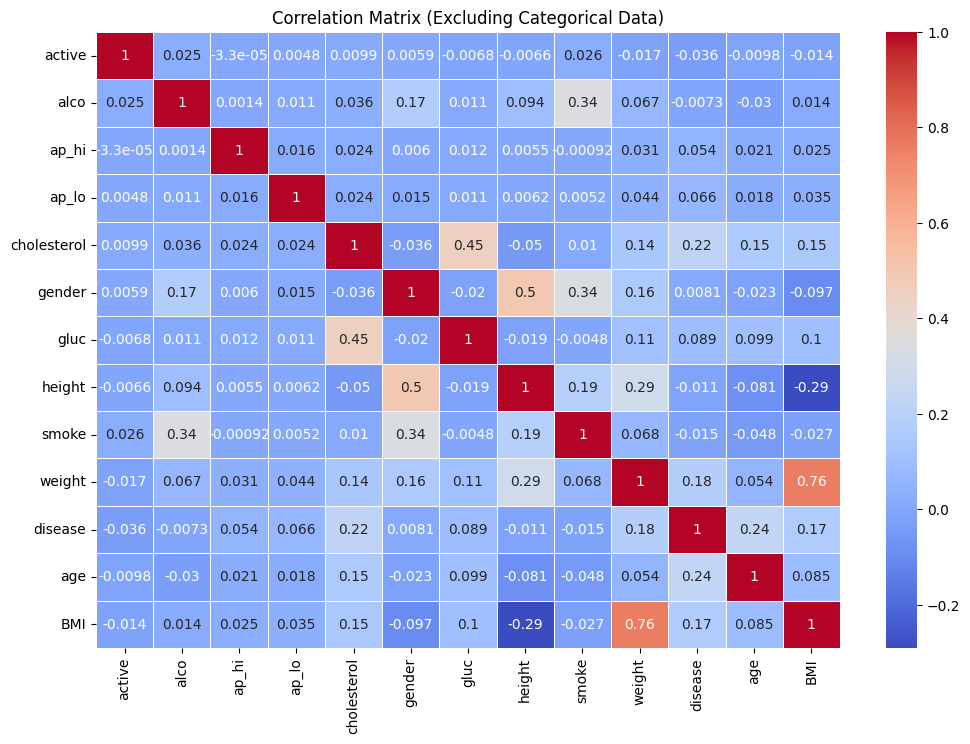

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'country' and 'occupation' columns for correlation calculation
data_numeric = data.drop(columns=['country', 'occupation'])

# Calculate the correlation matrix for numeric data
correlation_matrix = data_numeric.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Excluding Categorical Data)')
plt.show()

In [7]:
# Print the first few rows to verify the change
print(data.describe())


             active          alco         ap_hi         ap_lo   cholesterol  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       0.803729      0.053771    128.817286     96.630414      1.366871   
std        0.397179      0.225568    154.011419    188.472530      0.680250   
min        0.000000      0.000000   -150.000000    -70.000000      1.000000   
25%        1.000000      0.000000    120.000000     80.000000      1.000000   
50%        1.000000      0.000000    120.000000     80.000000      1.000000   
75%        1.000000      0.000000    140.000000     90.000000      2.000000   
max        1.000000      1.000000  16020.000000  11000.000000      3.000000   

             gender          gluc        height         smoke        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       1.349571      1.226457    164.359229      0.088129     74.205690   
std        0.476838      0.572270      8.210126    

In [8]:
# Set specific bounds for ap_hi and ap_lo
min_hi = 60  # Minimum acceptable value for ap_hi
max_hi = 240  # Maximum acceptable value for ap_hi
min_lo = 40  # Minimum acceptable value for ap_lo
max_lo = 190  # Maximum acceptable value for ap_lo

# Identify outliers for ap_hi
outliers_ap_hi = data[(data['ap_hi'] < min_hi) | (data['ap_hi'] > max_hi)]
num_outliers_ap_hi = len(outliers_ap_hi)

# Identify outliers for ap_lo
outliers_ap_lo = data[(data['ap_lo'] < min_lo) | (data['ap_lo'] > max_lo)]
num_outliers_ap_lo = len(outliers_ap_lo)

# Print the number of outliers
print(f"Number of outliers for ap_hi: {num_outliers_ap_hi}")
print(f"Number of outliers for ap_lo: {num_outliers_ap_lo}")

# If you want to see the outlier records, you can print them as well
print("Outliers for ap_hi:")
print(outliers_ap_hi)

print("Outliers for ap_lo:")
print(outliers_ap_lo)


Number of outliers for ap_hi: 228
Number of outliers for ap_lo: 1012
Outliers for ap_hi:
         country  active  alco  ap_hi  ap_lo  cholesterol  gender  gluc  \
567    Indonesia       1     0     14     90            2       1     1   
927    Singapore       1     0     14     90            3       2     1   
979     Malaysia       1     0     11     80            1       1     3   
1600    Malaysia       1     0     12     80            1       1     1   
1627   Singapore       1     0     14     80            1       1     1   
...          ...     ...   ...    ...    ...          ...     ...   ...   
68742  Indonesia       1     0     14     90            1       1     1   
68998      India       1     0     14     90            1       1     1   
69137  Singapore       1     0     12     80            1       2     1   
69370  Indonesia       1     0   2000    100            2       1     1   
69549  Indonesia       1     0     13     90            1       1     3   

       hei

In [9]:
# Define bounds for ap_hi and ap_lo
min_hi = 60
max_hi = 240
min_lo = 40
max_lo = 190

# Drop outliers for ap_hi
data = data[(data['ap_hi'] >= min_hi) & (data['ap_hi'] <= max_hi)]

# Drop outliers for ap_lo
data = data[(data['ap_lo'] >= min_lo) & (data['ap_lo'] <= max_lo)]

# Print the number of records after dropping outliers
print(f"Number of records after dropping outliers: {len(data)}")


Number of records after dropping outliers: 68775


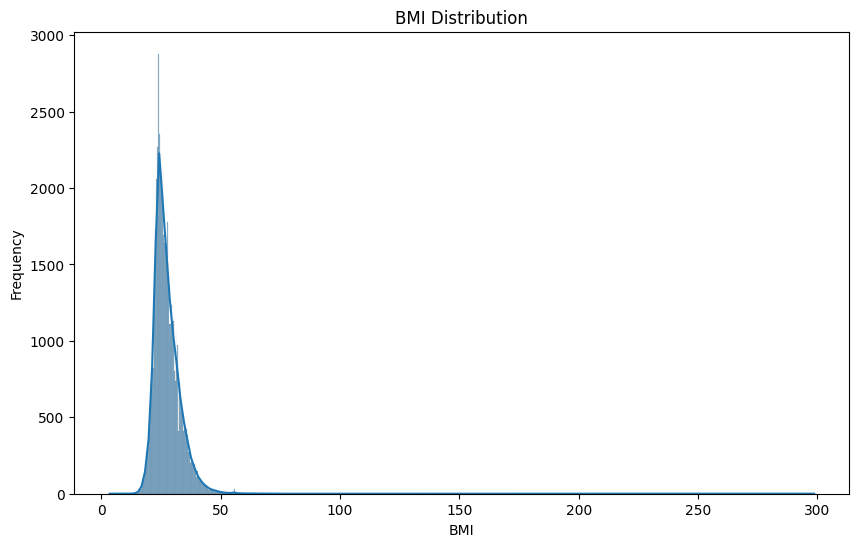

In [10]:
# check the BMI outliers

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the height-to-weight ratio distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['BMI'], kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


In [11]:
# Define bounds for BMI
min_bmi = 15  # Set your desired minimum BMI
max_bmi = 50  # Set your desired maximum BMI

# Remove outliers for BMI
data = data[(data['BMI'] >= min_bmi) & (data['BMI'] <= max_bmi)]

# Print the number of records after dropping outliers
print(f"Number of records after dropping BMI outliers: {len(data)}")


Number of records after dropping BMI outliers: 68514


In [12]:
# Save the Cleaned Data to a New CSV File
data.to_csv('/content/sample_data/cardio_data_cleaned_2.csv', index=False)

# Load cleaned Data
data = pd.read_csv('/content/sample_data/cardio_data_cleaned_2.csv')

# Print the first few rows to verify the change
print(data.describe())


             active          alco         ap_hi         ap_lo   cholesterol  \
count  68514.000000  68514.000000  68514.000000  68514.000000  68514.000000   
mean       0.803383      0.053653    126.587384     81.366859      1.364086   
std        0.397443      0.225334     16.736981      9.664295      0.678522   
min        0.000000      0.000000     60.000000     40.000000      1.000000   
25%        1.000000      0.000000    120.000000     80.000000      1.000000   
50%        1.000000      0.000000    120.000000     80.000000      1.000000   
75%        1.000000      0.000000    140.000000     90.000000      1.000000   
max        1.000000      1.000000    240.000000    190.000000      3.000000   

             gender          gluc        height         smoke        weight  \
count  68514.000000  68514.000000  68514.000000  68514.000000  68514.000000   
mean       1.349155      1.225209    164.444800      0.088143     73.977361   
std        0.476706      0.571115      7.848649    

In [13]:
print (data.head())

     country  active  alco  ap_hi  ap_lo  cholesterol  gender  gluc  height  \
0  Indonesia       1     0    110     80            1       2     1     168   
1   Malaysia       1     0    140     90            3       1     1     156   
2  Indonesia       0     0    130     70            3       1     1     165   
3  Singapore       1     0    150    100            1       2     1     169   
4  Singapore       0     0    100     60            1       1     1     156   

   occupation  smoke  weight  disease   age    BMI  
0   Architect      0    62.0        0  50.0  21.97  
1  Accountant      0    85.0        1  55.0  34.93  
2        Chef      0    64.0        1  52.0  23.51  
3      Lawyer      0    82.0        1  48.0  28.71  
4   Architect      0    56.0        0  48.0  23.01  


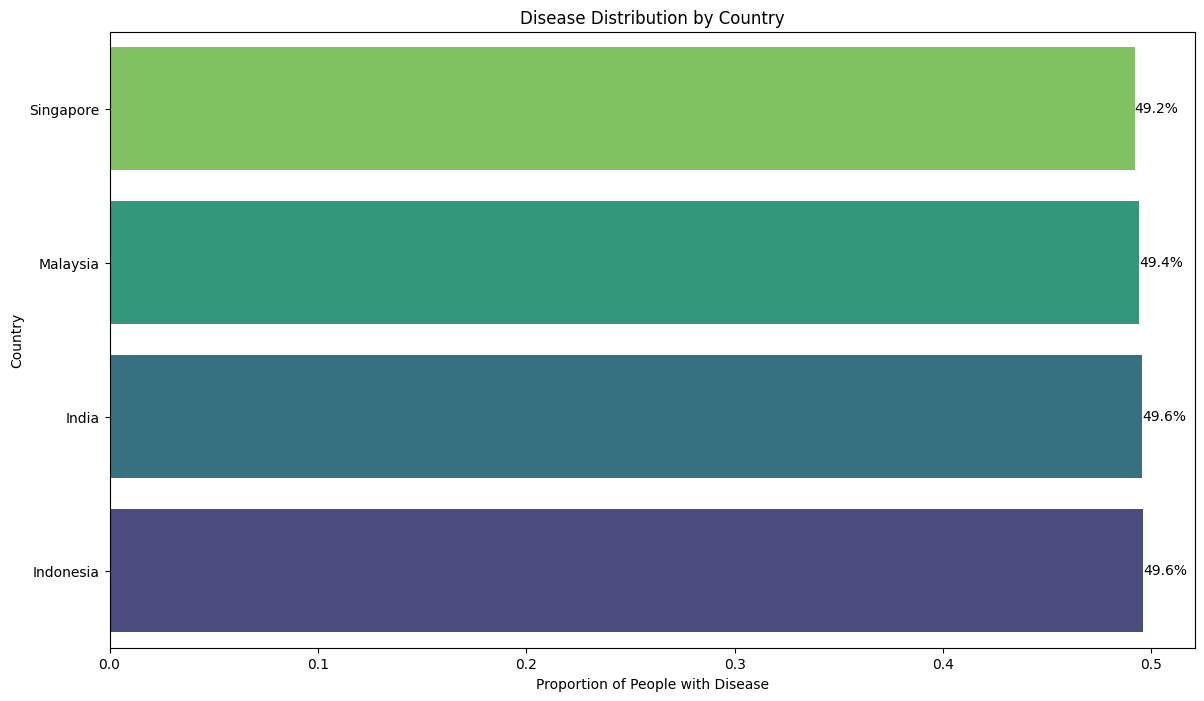

In [14]:
# Calculate the proportion of people with the disease in each country
disease_distribution = data.groupby('country')['disease'].mean().reset_index()

# Sort by the proportion of disease for better visualization
disease_distribution = disease_distribution.sort_values(by='disease', ascending=False)
#Visualize the distribution
plt.figure(figsize=(14, 8))
#sns.barplot(x='disease', y='country', data=disease_distribution, palette='viridis')
barplot = sns.barplot(x='disease', y='country', data=disease_distribution, hue='country', palette='viridis', legend=False)

plt.title('Disease Distribution by Country')
plt.xlabel('Proportion of People with Disease')
plt.ylabel('Country')

# Add labels to each bar
for index, value in enumerate(disease_distribution['disease']):
  plt.text(value, index, f'{value*100:.1f}%', color='black', ha="left", va="center")

plt.gca().invert_yaxis()
plt.show()


<ipython-input-15-66eab87d1c44>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disease_by_age_group = data.groupby('age_group')['disease'].mean().reset_index()
<ipython-input-15-66eab87d1c44>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='age_group', y='percentage', data=disease_by_age_group, palette='magma')


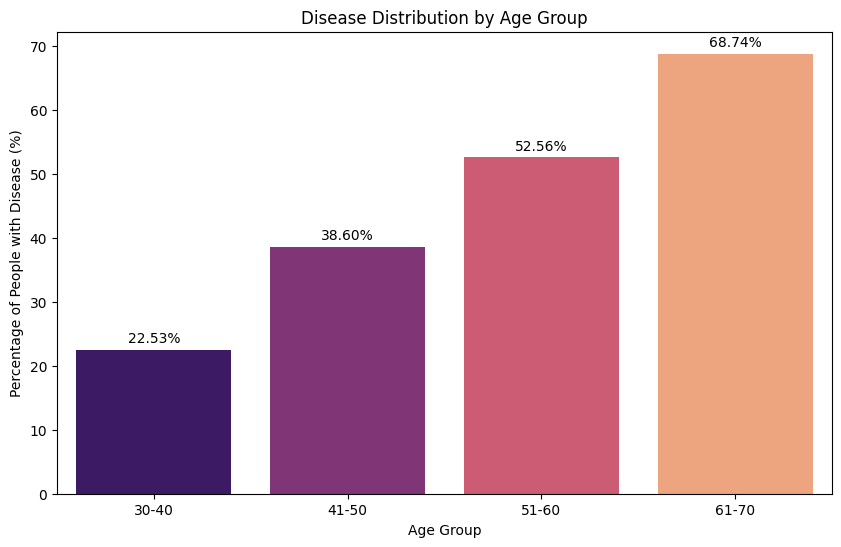

  age_group   disease  percentage
0     30-40  0.225269   22.526934
1     41-50  0.385950   38.595037
2     51-60  0.525555   52.555543
3     61-70  0.687439   68.743867


In [15]:
# Define new age groups
age_bins = [30, 41, 51, 61, 71]
age_labels = ['30-40', '41-50', '51-60', '61-70']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the percentage of people with the disease in each age group
disease_by_age_group = data.groupby('age_group')['disease'].mean().reset_index()
disease_by_age_group['percentage'] = disease_by_age_group['disease'] * 100

# Visualize the distribution
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='age_group', y='percentage', data=disease_by_age_group, palette='magma')
plt.title('Disease Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of People with Disease (%)')

# Add percentage values on top of the bars
for i in barplot.containers:
    barplot.bar_label(i, fmt='%.2f%%', padding=3)

plt.show()

# Display the results
print(disease_by_age_group)


<ipython-input-16-86d68e04922a>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disease_by_ap_hi_group = data.groupby('ap_hi_group')['disease'].mean().reset_index()
<ipython-input-16-86d68e04922a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_ap_hi = sns.barplot(x='ap_hi_group', y='percentage', data=disease_by_ap_hi_group, palette='viridis')


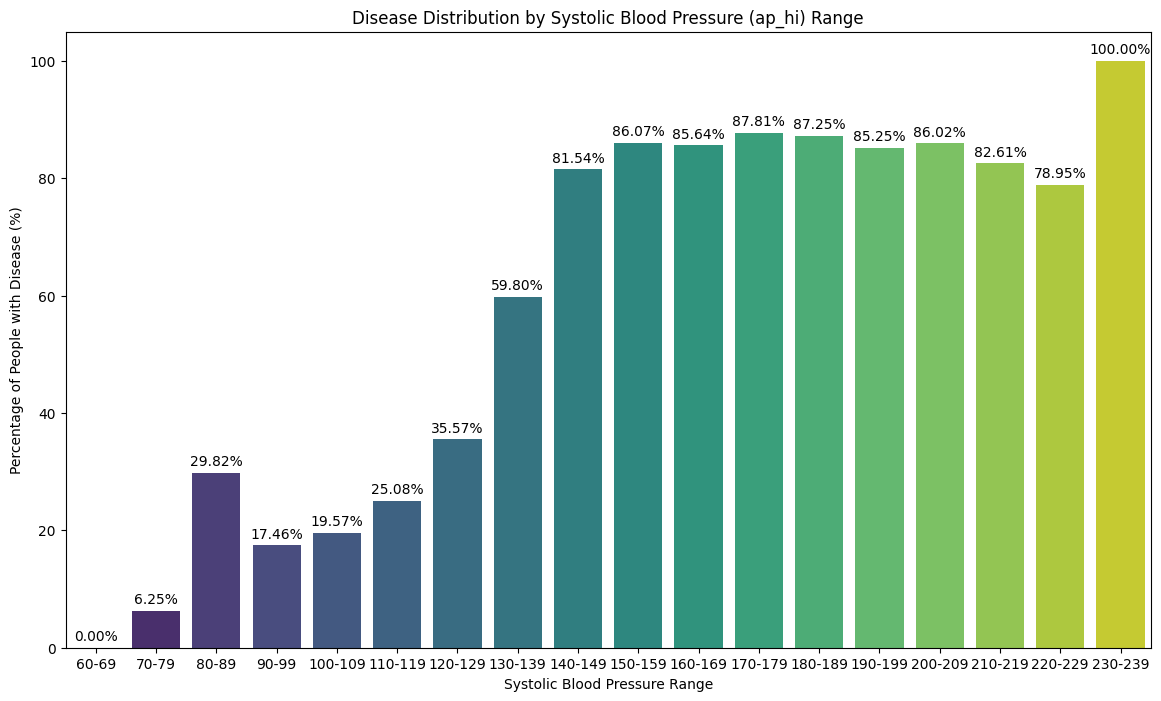

In [16]:
# Define systolic blood pressure (ap_hi) ranges
ap_hi_bins = list(range(60, 241, 10))  # From 60 to 240 with step of 10
ap_hi_labels = [f'{x}-{x+9}' for x in ap_hi_bins[:-1]]
data['ap_hi_group'] = pd.cut(data['ap_hi'], bins=ap_hi_bins, labels=ap_hi_labels, right=False)

# Calculate the percentage of people with the disease in each systolic blood pressure range
disease_by_ap_hi_group = data.groupby('ap_hi_group')['disease'].mean().reset_index()
disease_by_ap_hi_group['percentage'] = disease_by_ap_hi_group['disease'] * 100

# Visualize the distribution for systolic blood pressure
plt.figure(figsize=(14, 8))
barplot_ap_hi = sns.barplot(x='ap_hi_group', y='percentage', data=disease_by_ap_hi_group, palette='viridis')
plt.title('Disease Distribution by Systolic Blood Pressure (ap_hi) Range')
plt.xlabel('Systolic Blood Pressure Range')
plt.ylabel('Percentage of People with Disease (%)')

# Add percentage values on top of the bars
for i in barplot_ap_hi.containers:
    barplot_ap_hi.bar_label(i, fmt='%.2f%%', padding=3)

plt.show()


<ipython-input-17-25c2a39d1213>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disease_by_ap_lo_group = data.groupby('ap_lo_group')['disease'].mean().reset_index()
<ipython-input-17-25c2a39d1213>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_ap_lo = sns.barplot(x='ap_lo_group', y='percentage', data=disease_by_ap_lo_group, palette='plasma')


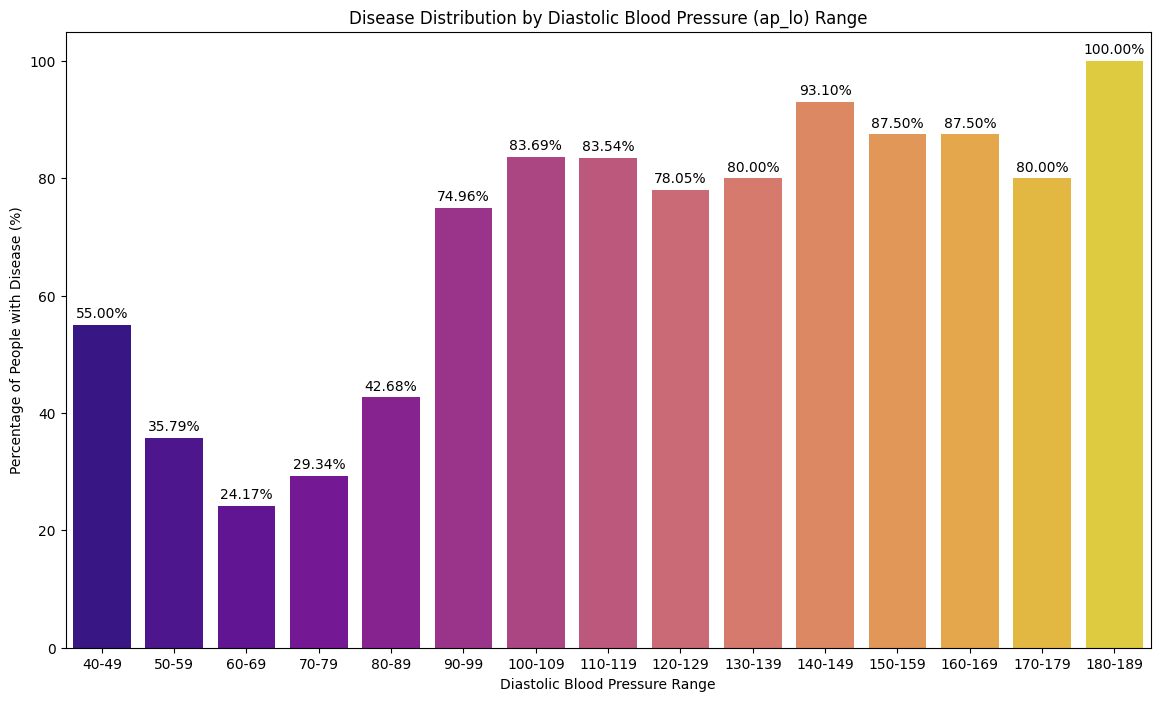

In [17]:
# Define diastolic blood pressure (ap_lo) ranges
ap_lo_bins = list(range(40, 191, 10))  # From 40 to 190 with step of 10
ap_lo_labels = [f'{x}-{x+9}' for x in ap_lo_bins[:-1]]
data['ap_lo_group'] = pd.cut(data['ap_lo'], bins=ap_lo_bins, labels=ap_lo_labels, right=False)

# Calculate the percentage of people with the disease in each diastolic blood pressure range
disease_by_ap_lo_group = data.groupby('ap_lo_group')['disease'].mean().reset_index()
disease_by_ap_lo_group['percentage'] = disease_by_ap_lo_group['disease'] * 100

# Visualize the distribution for diastolic blood pressure
plt.figure(figsize=(14, 8))
barplot_ap_lo = sns.barplot(x='ap_lo_group', y='percentage', data=disease_by_ap_lo_group, palette='plasma')
plt.title('Disease Distribution by Diastolic Blood Pressure (ap_lo) Range')
plt.xlabel('Diastolic Blood Pressure Range')
plt.ylabel('Percentage of People with Disease (%)')

# Add percentage values on top of the bars
for i in barplot_ap_lo.containers:
    barplot_ap_lo.bar_label(i, fmt='%.2f%%', padding=3)

plt.show()


<ipython-input-18-3ddabe18c5d3>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disease_by_BMI_group = data.groupby('BMI_group')['disease'].mean().reset_index()
<ipython-input-18-3ddabe18c5d3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_bmi = sns.barplot(x='BMI_group', y='percentage', data=disease_by_BMI_group, palette='inferno')


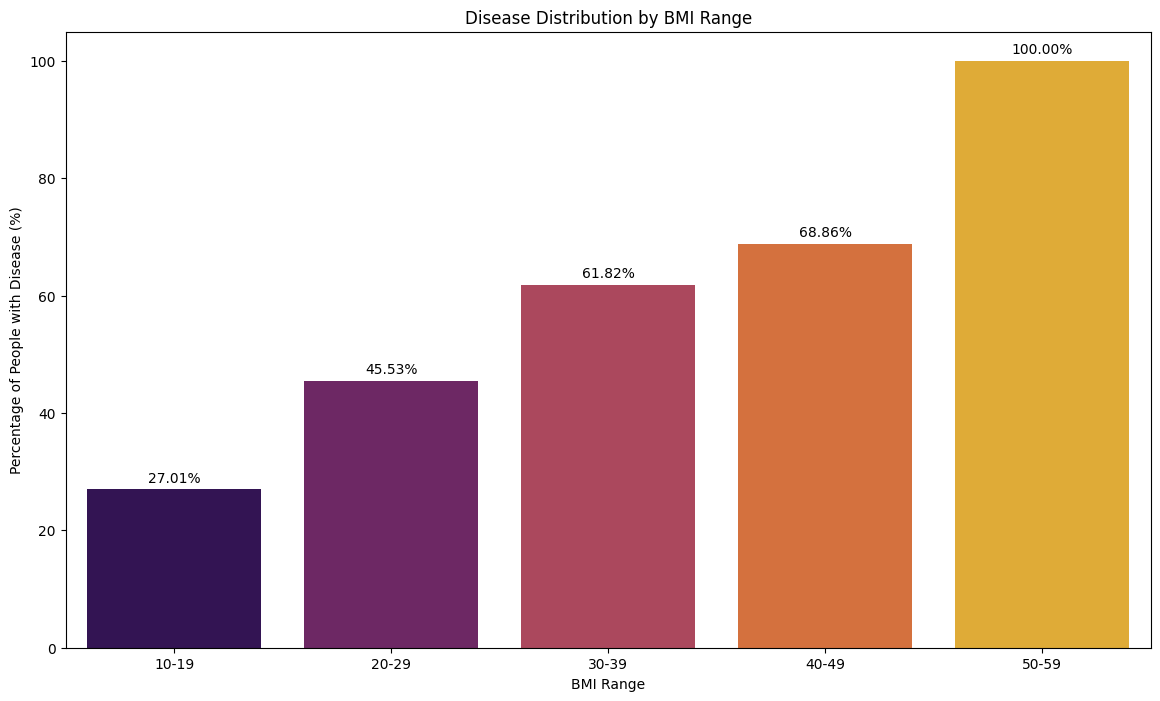

  BMI_group   disease  percentage
0     10-19  0.270121   27.012128
1     20-29  0.455306   45.530618
2     30-39  0.618212   61.821204
3     40-49  0.688608   68.860759
4     50-59  1.000000  100.000000


In [18]:
# Define BMI ranges
bmi_bins = list(range(10, 61, 10))  # From 10 to 60 with steps of 10
bmi_labels = [f'{x}-{x+9}' for x in bmi_bins[:-1]]
data['BMI_group'] = pd.cut(data['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

# Calculate the percentage of people with the disease in each BMI range
disease_by_BMI_group = data.groupby('BMI_group')['disease'].mean().reset_index()
disease_by_BMI_group['percentage'] = disease_by_BMI_group['disease'] * 100

# Visualize the distribution for BMI
plt.figure(figsize=(14, 8))
barplot_bmi = sns.barplot(x='BMI_group', y='percentage', data=disease_by_BMI_group, palette='inferno')
plt.title('Disease Distribution by BMI Range')
plt.xlabel('BMI Range')
plt.ylabel('Percentage of People with Disease (%)')

# Add percentage values on top of the bars
for i in barplot_bmi.containers:
    barplot_bmi.bar_label(i, fmt='%.2f%%', padding=3)

plt.show()

# Display the results
print(disease_by_BMI_group)


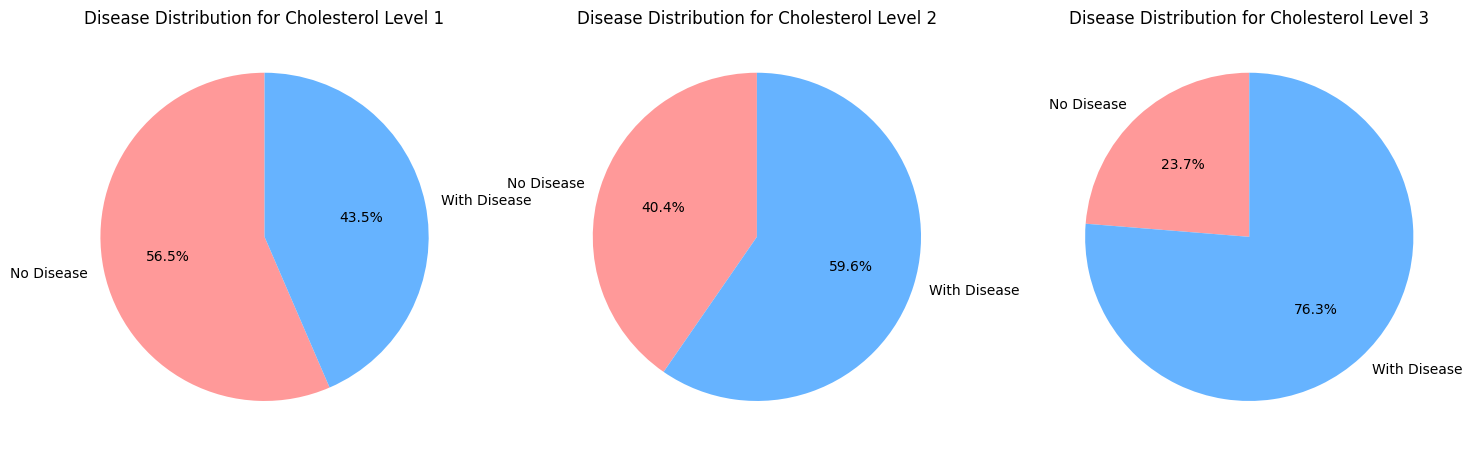

In [19]:
# Update disease labels
data['disease'] = data['disease'].replace({0: 'No Disease', 1: 'With Disease'})

# Define cholesterol categories as is
cholesterol_labels = ['Level 1', 'Level 2', 'Level 3']
data['cholesterol_group'] = data['cholesterol'].replace({1: 'Level 1', 2: 'Level 2', 3: 'Level 3'})

# Calculate the percentage of people with and without the disease in each cholesterol category
cholesterol_disease = data.groupby(['cholesterol_group', 'disease']).size().unstack(fill_value=0)
cholesterol_disease = cholesterol_disease.apply(lambda x: x/x.sum() * 100, axis=1)

# Plot pie charts for each cholesterol level
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (level, row) in zip(axes, cholesterol_disease.iterrows()):
    row.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'], labels=row.index)
    ax.set_ylabel('')
    ax.set_title(f'Disease Distribution for Cholesterol {level}')

plt.show()


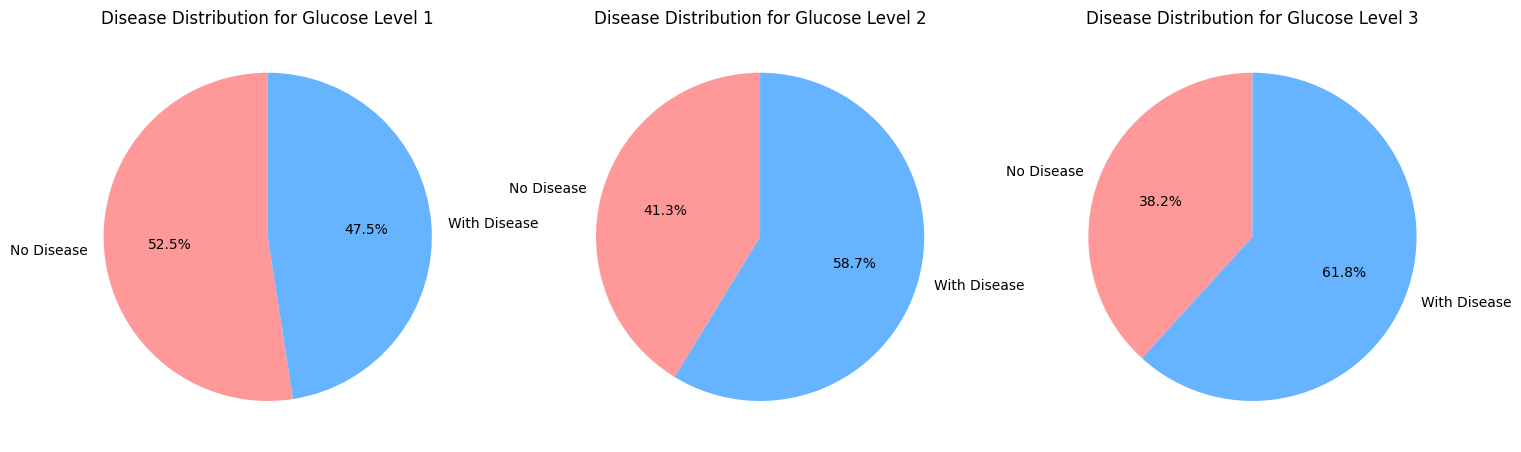

In [20]:
# Define glucose categories as is
glucose_labels = ['Level 1', 'Level 2', 'Level 3']
data['glucose_group'] = data['gluc'].replace({1: 'Level 1', 2: 'Level 2', 3: 'Level 3'})

# Calculate the percentage of people with and without the disease in each glucose category
glucose_disease = data.groupby(['glucose_group', 'disease']).size().unstack(fill_value=0)
glucose_disease = glucose_disease.apply(lambda x: x/x.sum() * 100, axis=1)

# Plot pie charts for each glucose level
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (level, row) in zip(axes, glucose_disease.iterrows()):
    row.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'], labels=row.index)
    ax.set_ylabel('')
    ax.set_title(f'Disease Distribution for Glucose {level}')

plt.show()


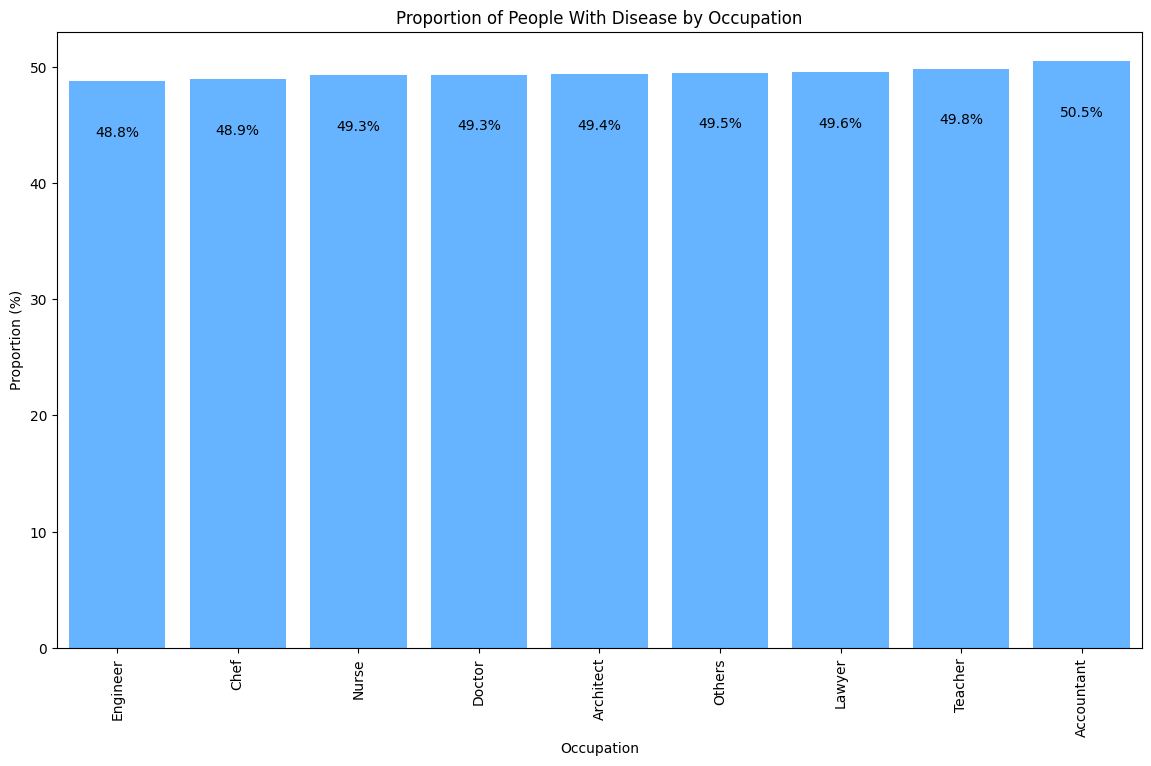

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('/content/sample_data/cardio_data_cleaned_2.csv')

# Update disease labels (temporarily keeping the numeric format for calculations)
data['disease_numeric'] = data['disease'].replace({'No Disease': 0, 'With Disease': 1})

# Calculate the proportion of people with the disease in each occupation category
occupation_disease_proportion = data.groupby('occupation')['disease_numeric'].mean() * 100

# Sort the values for better visualization
occupation_disease_proportion = occupation_disease_proportion.sort_values()

# Plot a bar chart
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(occupation_disease_proportion.index, occupation_disease_proportion.values, color='#66b3ff')
occupation_disease_proportion.plot(kind='bar', ax=ax, color='#66b3ff')
ax.set_title('Proportion of People With Disease by Occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Proportion (%)')

# Add percentage labels inside each bar
for bar in bars:
  height = bar.get_height()
  ax.text(bar.get_x() + bar.get_width() / 2, height - 5, f'{height:.1f}%', ha='center', va='bottom', color='black')

plt.show()


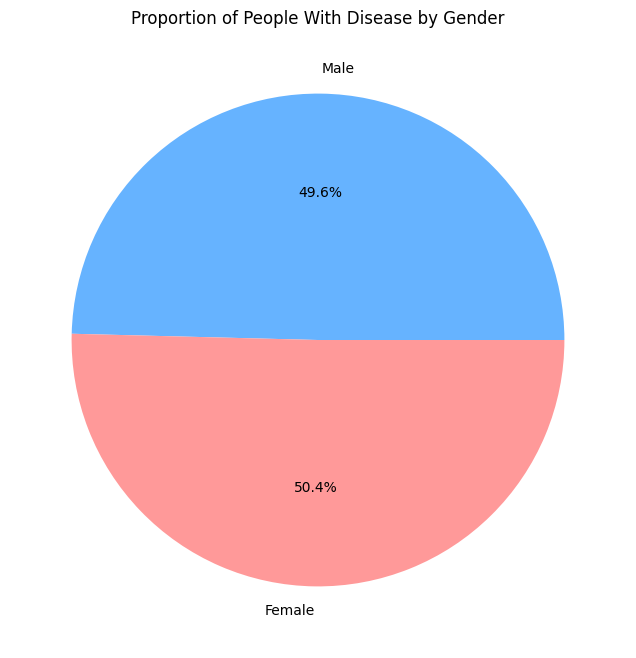

In [22]:
import matplotlib.pyplot as plt

# Calculate the proportion of people with the disease by gender
gender_disease_proportion = data.groupby('gender')['disease_numeric'].mean() * 100

# Convert gender to readable labels
gender_labels = {1: 'Male', 2: 'Female'}
gender_disease_proportion.index = gender_disease_proportion.index.map(gender_labels)

# Plot a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(gender_disease_proportion, labels=gender_disease_proportion.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
ax.set_title('Proportion of People With Disease by Gender')

plt.show()


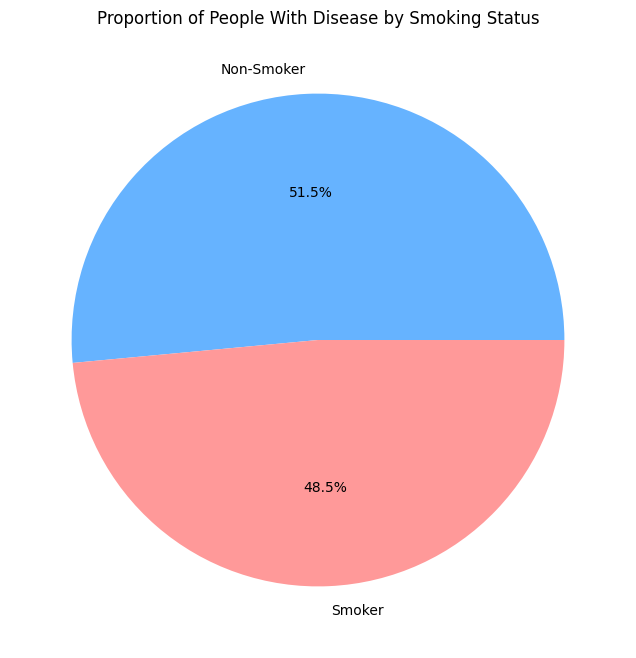

In [23]:
# Calculate the proportion of people with the disease by smoking status
smoke_disease_proportion = data.groupby('smoke')['disease_numeric'].mean() * 100

# Convert smoke to readable labels
smoke_labels = {0: 'Non-Smoker', 1: 'Smoker'}
smoke_disease_proportion.index = smoke_disease_proportion.index.map(smoke_labels)

# Plot a pie chart for smoking
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(smoke_disease_proportion, labels=smoke_disease_proportion.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
ax.set_title('Proportion of People With Disease by Smoking Status')

plt.show()


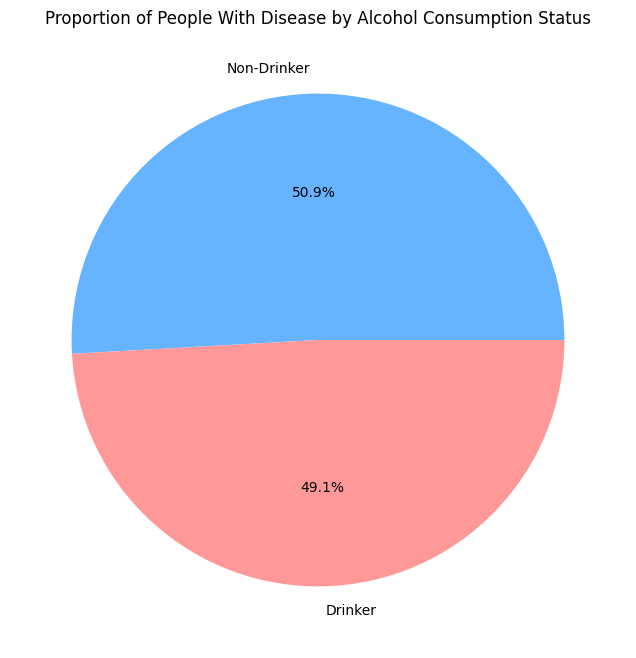

In [24]:
# Calculate the proportion of people with the disease by alcohol consumption status
alco_disease_proportion = data.groupby('alco')['disease_numeric'].mean() * 100

# Convert alcohol consumption to readable labels
alco_labels = {0: 'Non-Drinker', 1: 'Drinker'}
alco_disease_proportion.index = alco_disease_proportion.index.map(alco_labels)

# Plot a pie chart for alcohol consumption
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(alco_disease_proportion, labels=alco_disease_proportion.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
ax.set_title('Proportion of People With Disease by Alcohol Consumption Status')

plt.show()


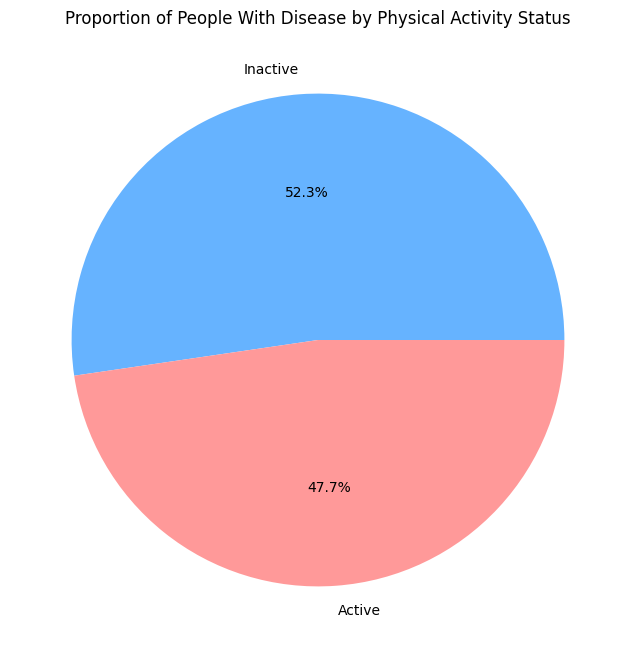

In [25]:
# Calculate the proportion of people with the disease by physical activity status
active_disease_proportion = data.groupby('active')['disease_numeric'].mean() * 100

# Convert physical activity to readable labels
active_labels = {0: 'Inactive', 1: 'Active'}
active_disease_proportion.index = active_disease_proportion.index.map(active_labels)

# Plot a pie chart for physical activity
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(active_disease_proportion, labels=active_disease_proportion.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
ax.set_title('Proportion of People With Disease by Physical Activity Status')

plt.show()


In [49]:
# Prediction Section

import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('/content/sample_data/cardio_data_cleaned_2.csv')

#Step 1. Prepare the Data
# Select the relevant features for the model
features = ['age', 'ap_hi', 'ap_lo', 'BMI', 'cholesterol', 'gluc', 'active', 'smoke', 'alco']

# Sample a subset of the data
# data = data.sample(n=10000, random_state=42)

# or just use the entire DataFrame as it is
print(f"Total number of records: {len(data)}")

X = data[features]
y = data['disease']

Total number of records: 68514


In [50]:
#Step 2. Split the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [51]:
#Step 3. Train a Machine Learning Model
# Model 1 used: Random Forest Classifier, which is a robust model for classification tasks.
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
#Step 4. Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.68
Confusion Matrix:
[[7102 3297]
 [3215 6941]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.68      0.69     10399
           1       0.68      0.68      0.68     10156

    accuracy                           0.68     20555
   macro avg       0.68      0.68      0.68     20555
weighted avg       0.68      0.68      0.68     20555



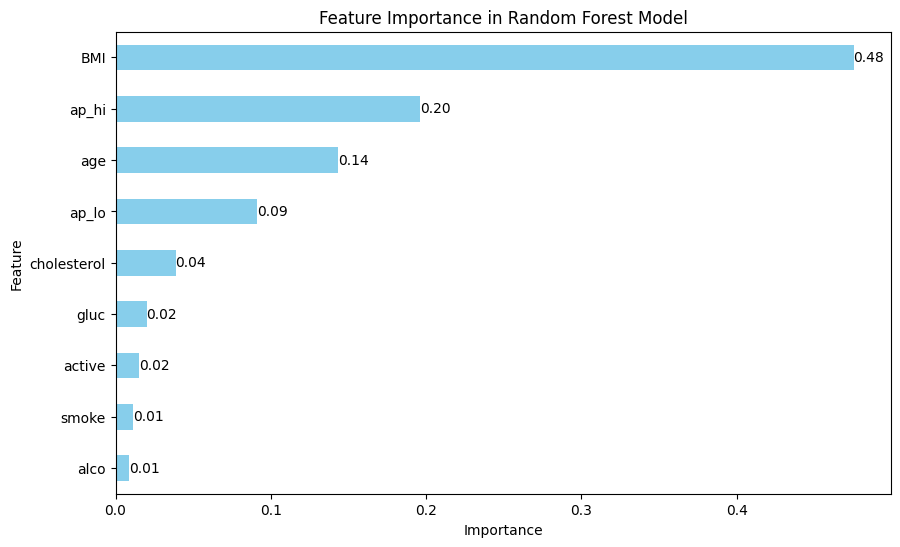

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming model and features are already defined
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
bars = feature_importance.plot(kind='barh', color='skyblue')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # To display the highest importance at the top

# Add labels to each bar
for index, value in enumerate(feature_importance):
    plt.text(value, index, f'{value:.2f}', color='black', ha='left', va='center')

plt.show()


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train the Random Forest model
#rf_model = RandomForestClassifier(random_state=42)
#rf_model.fit(X_train_scaled, y_train)

# Extract feature importances
importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Display feature importance ranking
ranking_df = feature_importance.reset_index()
ranking_df.columns = ['Feature', 'Importance']

print(ranking_df)


       Feature  Importance
0          BMI    0.473999
1        ap_hi    0.196849
2          age    0.143602
3        ap_lo    0.091217
4  cholesterol    0.038796
5         gluc    0.020289
6       active    0.014650
7         alco    0.011496
8        smoke    0.009104


In [58]:
# Model 2: Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load your data
data = pd.read_csv('/content/sample_data/cardio_data_cleaned_2.csv')

# Select features and target
features = ['age', 'ap_hi', 'ap_lo', 'BMI', 'cholesterol', 'gluc', 'active', 'alco', 'smoke']
X = data[features]
y = data['disease']
#y = data['disease'].replace({'No Disease': 0, 'With Disease': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [59]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [60]:
import warnings
warnings.filterwarnings('ignore')

# Train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic, target_names=['No Disease', 'With Disease'])

# Print the results
print(f'Logistic Regression Accuracy: {accuracy_logistic:.2f}')
print('Confusion Matrix:')
print(conf_matrix_logistic)
print('Classification Report:')
print(class_report_logistic)


Logistic Regression Accuracy: 0.72
Confusion Matrix:
[[8147 2252]
 [3442 6714]]
Classification Report:
              precision    recall  f1-score   support

  No Disease       0.70      0.78      0.74     10399
With Disease       0.75      0.66      0.70     10156

    accuracy                           0.72     20555
   macro avg       0.73      0.72      0.72     20555
weighted avg       0.73      0.72      0.72     20555



In [61]:
logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=5000)

       Feature  Importance
0        ap_hi    0.894982
1          age    0.343076
2  cholesterol    0.335970
3        ap_lo    0.163015
4          BMI    0.149985
5        smoke   -0.033780
6         alco   -0.038739
7         gluc   -0.080482
8       active   -0.092542


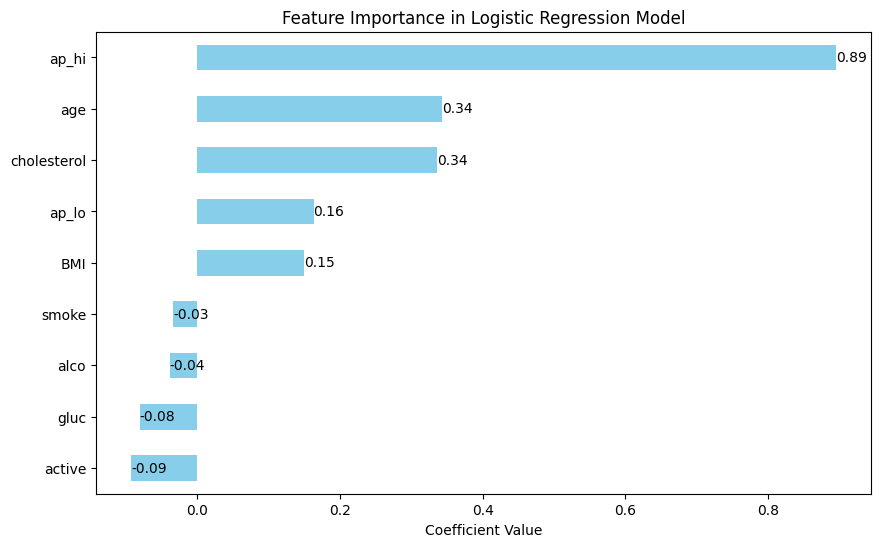

In [62]:
# Extract coefficients
coefficients = logistic_model.coef_[0]
feature_importance = pd.Series(coefficients, index=features).sort_values(ascending=False)

# Display feature importance ranking
ranking_df = feature_importance.reset_index()
ranking_df.columns = ['Feature', 'Importance']

print(ranking_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
bars = feature_importance.plot(kind='barh', color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression Model')
plt.gca().invert_yaxis()  # To display the highest importance at the top

# Add labels to each bar
for index, value in enumerate(feature_importance):
    plt.text(value, index, f'{value:.2f}', color='black', ha='left', va='center')

plt.show()


In [63]:
# Model3 used: Support Vector Machine (SVM)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your data
data = pd.read_csv('/content/sample_data/cardio_data_cleaned_2.csv')

#Step 1. Prepare the Data
# Select the relevant features for the model
features = ['age', 'ap_hi', 'ap_lo', 'BMI', 'cholesterol', 'gluc', 'active', 'smoke', 'alco']

# Sample a subset of the data
#data = data.sample(n=10000, random_state=42)

X = data[features]
y = data['disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_svm))
print('Classification Report:')
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.72
Confusion Matrix:
[[8513 1886]
 [3792 6364]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75     10399
           1       0.77      0.63      0.69     10156

    accuracy                           0.72     20555
   macro avg       0.73      0.72      0.72     20555
weighted avg       0.73      0.72      0.72     20555



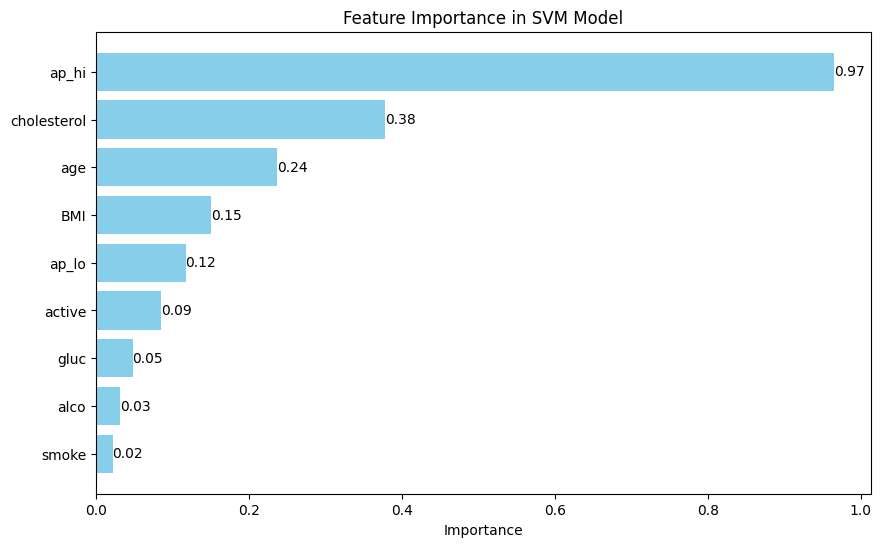

In [64]:
import matplotlib.pyplot as plt

# Extract feature importance (coefficients)
feature_importance = abs(svm_model.coef_[0])
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in SVM Model')
plt.gca().invert_yaxis()  # To display the highest importance at the top

# Add labels to each bar
for bar in bars:
  width = bar.get_width()
  plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center', color='black')

plt.show()


In [65]:
from sklearn.model_selection import train_test_split

feature_importance = abs(svm_model.coef_[0])
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


       Feature  Importance
1        ap_hi    0.965076
4  cholesterol    0.377771
0          age    0.236783
3          BMI    0.150690
2        ap_lo    0.117129
6       active    0.085272
5         gluc    0.047784
8         alco    0.031495
7        smoke    0.021719


In [44]:
# Model4 used: Gradient Boost Machine

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load your data
data = pd.read_csv('/content/sample_data/cardio_data_cleaned_2.csv')

# Select features and target
features = ['age', 'ap_hi', 'ap_lo', 'BMI', 'cholesterol', 'gluc', 'active', 'alco', 'smoke']
X = data[features]
y = data['disease'].replace({'No Disease': 0, 'With Disease': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Gradient Boosting model
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gbm = gbm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm, target_names=['No Disease', 'With Disease'])

print(f'Gradient Boosting Accuracy: {accuracy_gbm:.2f}')
print('Confusion Matrix:')
print(conf_matrix_gbm)
print('Classification Report:')
print(class_report_gbm)


Gradient Boosting Accuracy: 0.73
Confusion Matrix:
[[8033 2366]
 [3163 6993]]
Classification Report:
              precision    recall  f1-score   support

  No Disease       0.72      0.77      0.74     10399
With Disease       0.75      0.69      0.72     10156

    accuracy                           0.73     20555
   macro avg       0.73      0.73      0.73     20555
weighted avg       0.73      0.73      0.73     20555



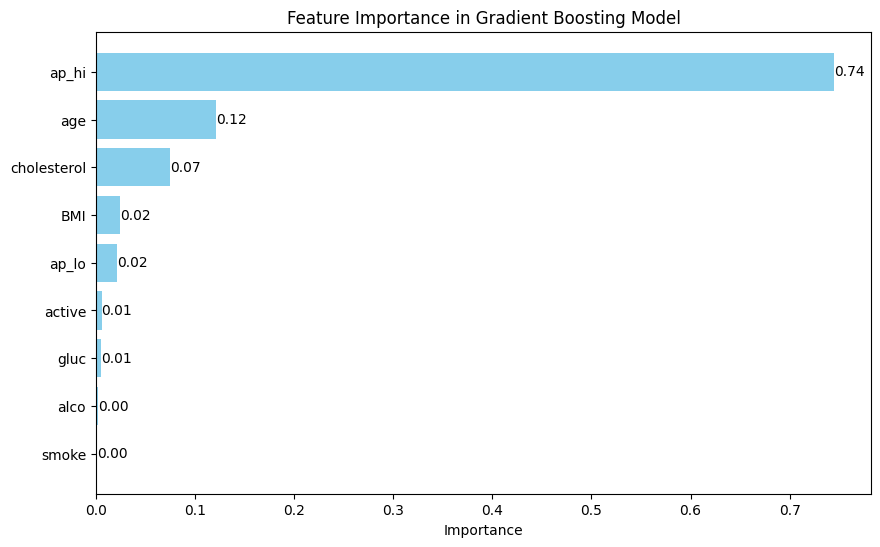

In [66]:
# Extract feature importances
importances = gbm_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Gradient Boosting Model')
plt.gca().invert_yaxis()  # To display the highest importance at the top

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center', color='black')

plt.show()


In [67]:
# Extract feature importances
importances = gbm_model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Display feature importance ranking
ranking_df = feature_importance.reset_index()
ranking_df.columns = ['Feature', 'Importance']

print(ranking_df)


       Feature  Importance
0        ap_hi    0.744795
1          age    0.121002
2  cholesterol    0.074991
3          BMI    0.024016
4        ap_lo    0.020897
5       active    0.005633
6         gluc    0.005214
7         alco    0.002239
8        smoke    0.001213


In [46]:
#Compare the 4 models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Load your data
data = pd.read_csv('/content/sample_data/cardio_data_cleaned_2.csv')

# Prepare the data
features = ['age', 'ap_hi', 'ap_lo', 'BMI', 'cholesterol', 'gluc', 'active', 'smoke', 'alco']
X = data[features]
y = data['disease'].replace({'No Disease': 0, 'With Disease': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate the models
results = []

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.722987   0.748829  0.661087  0.702228
1        Random Forest  0.683337   0.678198  0.683340  0.680759
2                  SVM  0.723766   0.771394  0.626625  0.691514
3    Gradient Boosting  0.731014   0.747195  0.688558  0.716679
